In [1]:
# Install Kaggle API
!pip install kaggle

# Create a Kaggle directory to store the API key
!mkdir ~/.kaggle



# Move the kaggle.json file to the .kaggle folder
!mv kaggle.json ~/.kaggle/

# Set permissions to the file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
# Download the dataset (replace the dataset link with the IMDb dataset you're using)
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip the dataset
!unzip /content/imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 30.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 105MB/s] 
Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Load the movies metadata dataset
movies_df = pd.read_csv('/content/IMDB Dataset.csv')

# Display the first few rows of the dataset
movies_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Display column names
movies_df.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
# Check the structure of the dataset
movies_df.info()

# Summary statistics for the dataset
movies_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


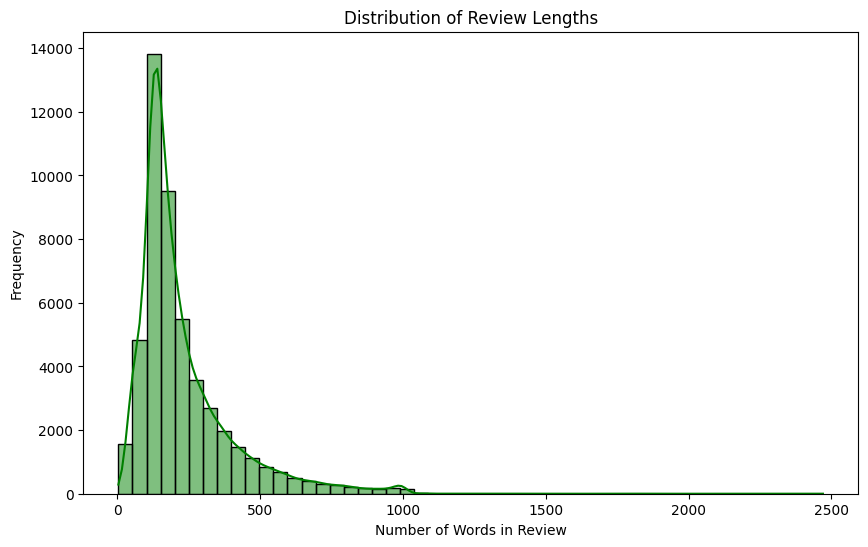

In [5]:
# Calculate the length of each review (in words)
movies_df['review_length'] = movies_df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['review_length'], bins=50, kde=True, color='green')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()


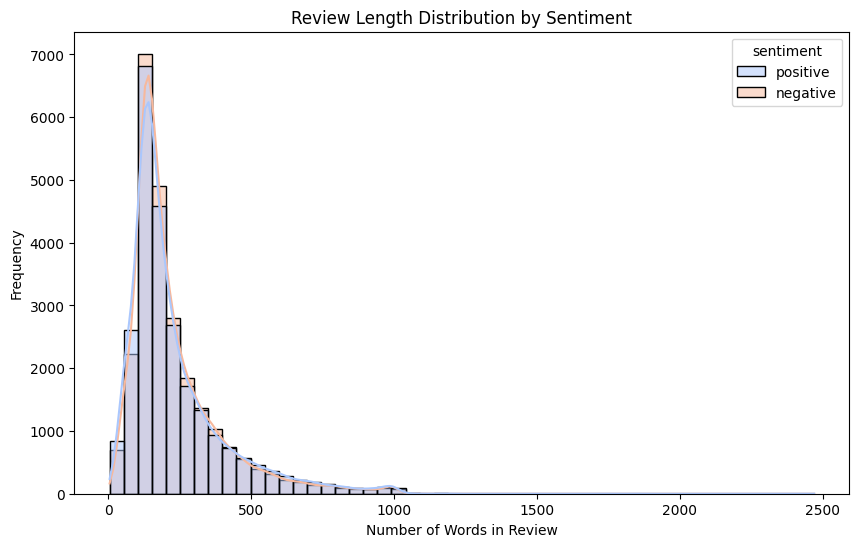

In [6]:
# Plot the distribution of review lengths for each sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='review_length', hue='sentiment', bins=50, kde=True, palette='coolwarm')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()


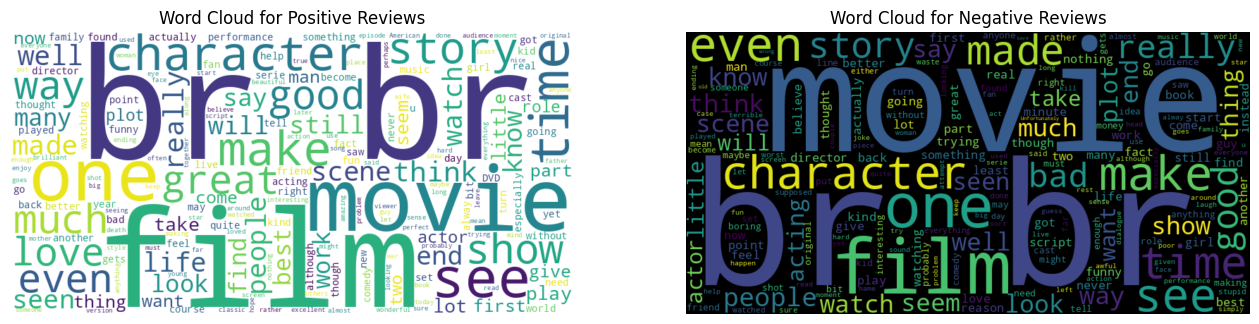

In [7]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = ' '.join(movies_df[movies_df['sentiment'] == 'positive']['review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = ' '.join(movies_df[movies_df['sentiment'] == 'negative']['review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


<ipython-input-8-3e9fec50321b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies_df, x='sentiment', palette='coolwarm')


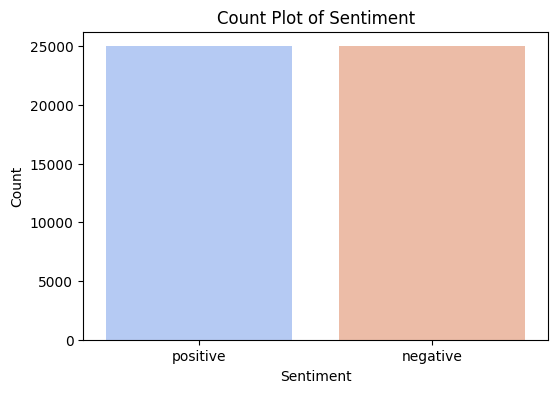

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(6, 4))

# Create the count plot for the 'sentiment' column
sns.countplot(data=movies_df, x='sentiment', palette='coolwarm')

# Add title and labels
plt.title('Count Plot of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Preprocessing**

In [17]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

# Apply cleaning function to the 'review' column
movies_df['cleaned_review'] = movies_df['review'].apply(clean_text)


# **TF-IDF Vectorizer**

In [11]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(movies_df['cleaned_review']).toarray()
y = movies_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert sentiment to binary labels


## **Train Test Split**

In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Implementation**

In [12]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    # "Support Vector Machine": SVC(kernel='linear',probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


## **Model Evalution**

Logistic Regression Accuracy: 88.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4328  633]
 [ 499 4540]]
Training Time: 9.2742 seconds
Prediction Time: 0.1068 seconds
Precision: 0.8871
Recall: 0.8868
F1-score: 0.8868


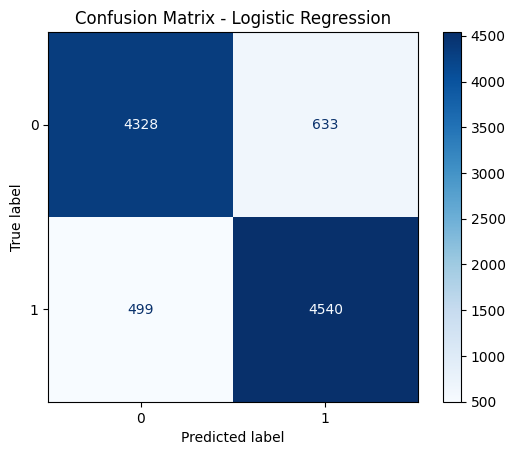

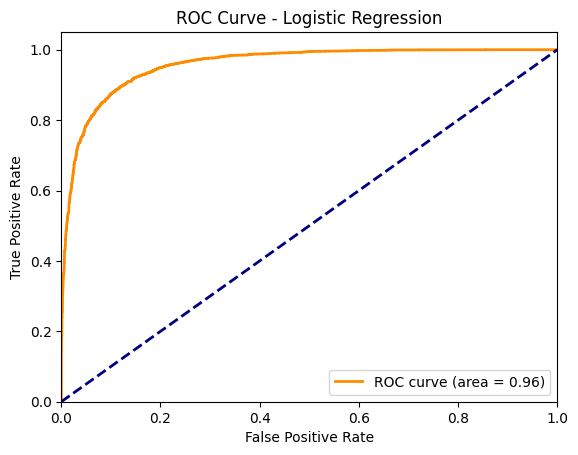



Naive Bayes Accuracy: 85.03%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4197  764]
 [ 733 4306]]
Training Time: 0.7113 seconds
Prediction Time: 0.1210 seconds
Precision: 0.8503
Recall: 0.8503
F1-score: 0.8503


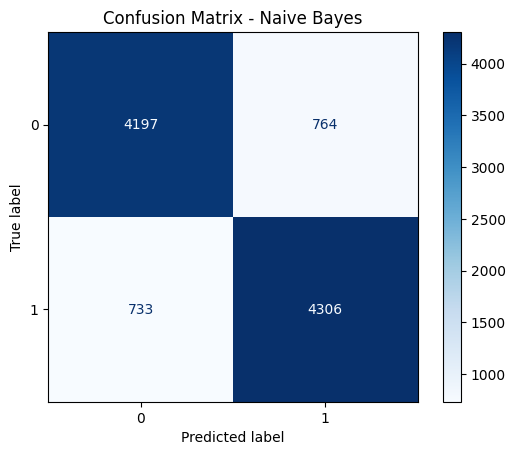

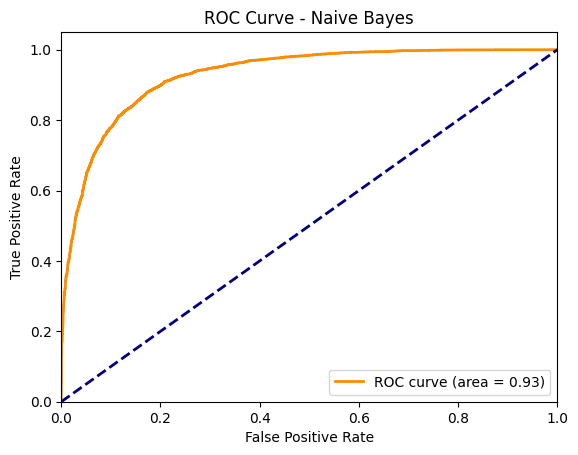



Random Forest Accuracy: 84.82%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4263  698]
 [ 820 4219]]
Training Time: 112.4755 seconds
Prediction Time: 0.9127 seconds
Precision: 0.8484
Recall: 0.8482
F1-score: 0.8482


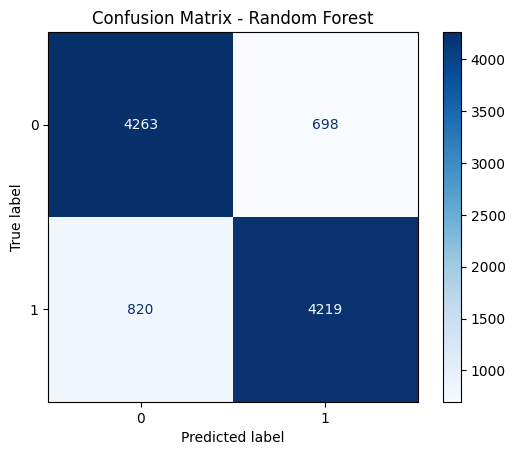

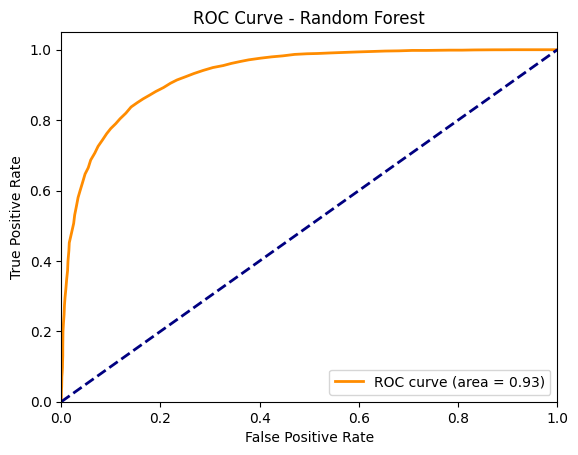



K-Nearest Neighbors Accuracy: 74.63%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      4961
           1       0.72      0.81      0.76      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.75     10000

Confusion Matrix:
 [[3370 1591]
 [ 946 4093]]
Training Time: 0.1422 seconds
Prediction Time: 159.0029 seconds
Precision: 0.7502
Recall: 0.7463
F1-score: 0.7451


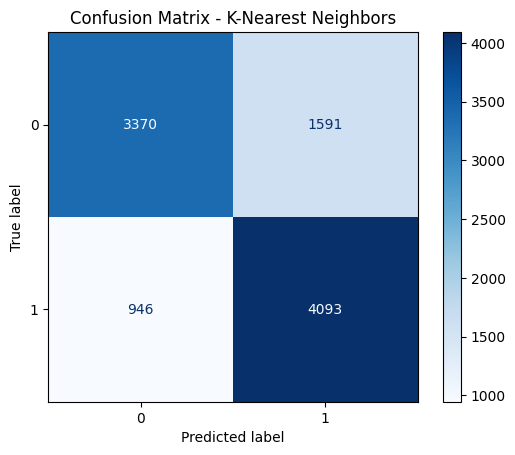

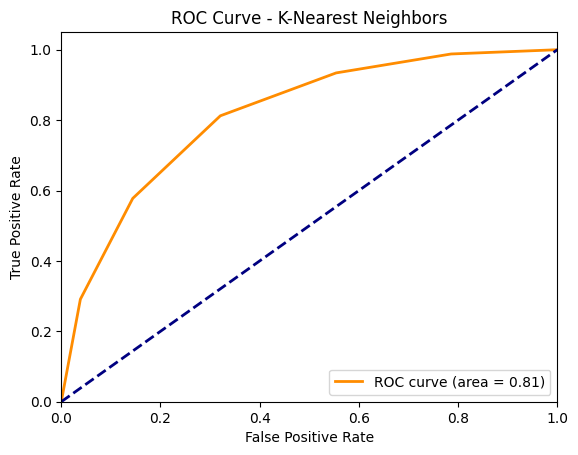

In [13]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay


# Function to calculate and visualize metrics
for model_name, model in models.items():
    start_time = time.time()  # Start time for training

    # Train the model
    model.fit(X_train, y_train)

    train_time = time.time() - start_time  # Calculate training time

    # Predict on test data
    start_time = time.time()  # Start time for prediction
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time  # Calculate prediction time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Output results
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {predict_time:.4f} seconds")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")


    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # Change colormap to 'Blues'
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("\n" + "="*50 + "\n")

# **Word2Vec Features Extraction Techniques**

In [14]:



from nltk.corpus import stopwords
import re
from gensim.models import Word2Vec
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:

# Tokenize the reviews
tokenized_reviews = [nltk.word_tokenize(review) for review in movies_df['cleaned_review']]

In [18]:
# Train Word2Vec model
model_w2v = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

In [19]:
def get_document_vector(tokens, model):
    """Get average word vectors for a document."""
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = [get_document_vector(tokens, model_w2v) for tokens in tokenized_reviews]
X= np.array(X)

## **Train Test Split**

In [23]:
from sklearn.preprocessing import MinMaxScaler


In [20]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Implementation**

In [26]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    # "Support Vector Machine": SVC(kernel='linear',probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2)
}


In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Evalution**

Logistic Regression Accuracy: 86.24%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
 [[4228  733]
 [ 643 4396]]
Training Time: 1.5235 seconds
Prediction Time: 0.0065 seconds
Precision: 0.8625
Recall: 0.8624
F1-score: 0.8624


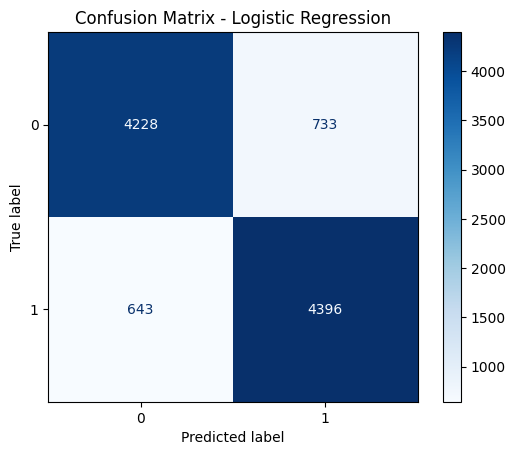

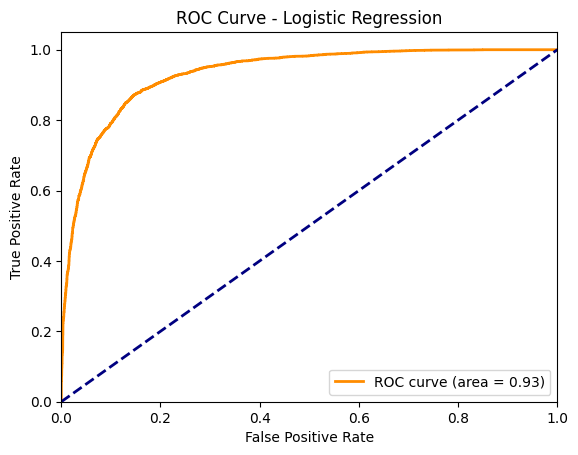



Naive Bayes Accuracy: 73.90%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      4961
           1       0.74      0.75      0.74      5039

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
 [[3635 1326]
 [1284 3755]]
Training Time: 0.0246 seconds
Prediction Time: 0.0041 seconds
Precision: 0.7390
Recall: 0.7390
F1-score: 0.7390


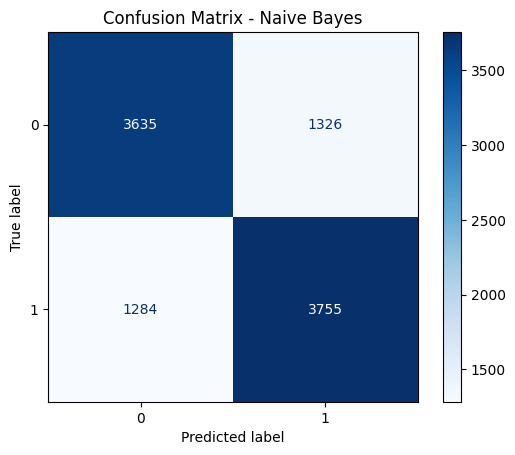

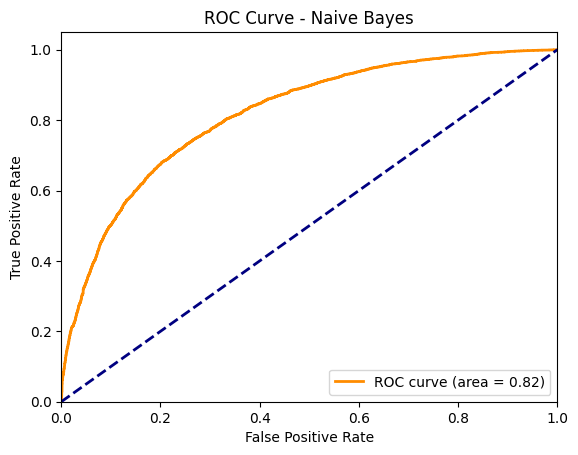



Random Forest Accuracy: 84.04%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      4961
           1       0.83      0.86      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[4081  880]
 [ 716 4323]]
Training Time: 129.1942 seconds
Prediction Time: 0.3762 seconds
Precision: 0.8407
Recall: 0.8404
F1-score: 0.8403


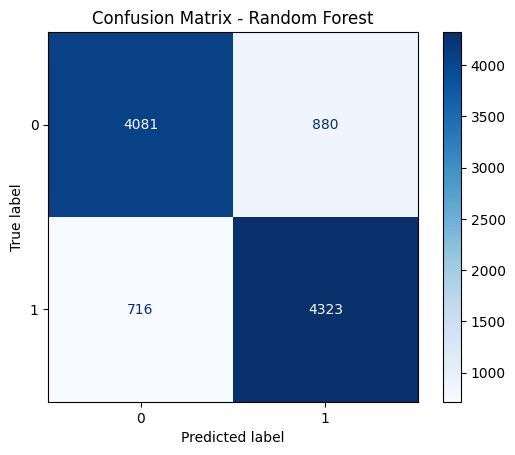

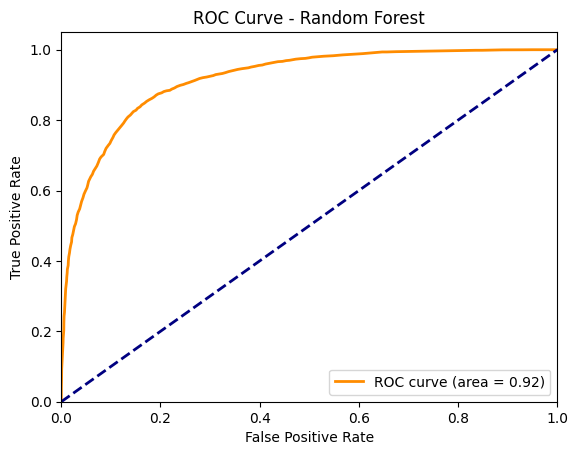



K-Nearest Neighbors Accuracy: 73.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77      4961
           1       0.84      0.59      0.69      5039

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.73     10000
weighted avg       0.76      0.74      0.73     10000

Confusion Matrix:
 [[4415  546]
 [2084 2955]]
Training Time: 0.0062 seconds
Prediction Time: 4.4129 seconds
Precision: 0.7623
Recall: 0.7370
F1-score: 0.7310


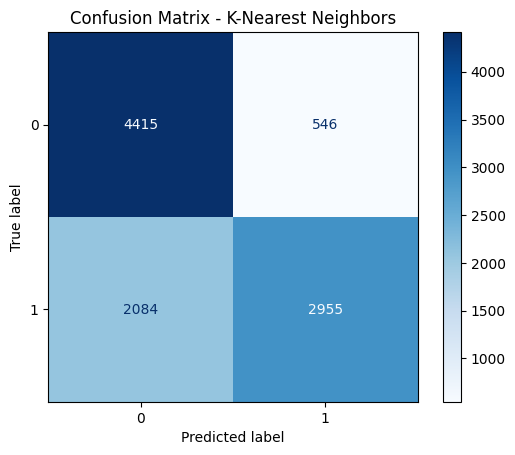

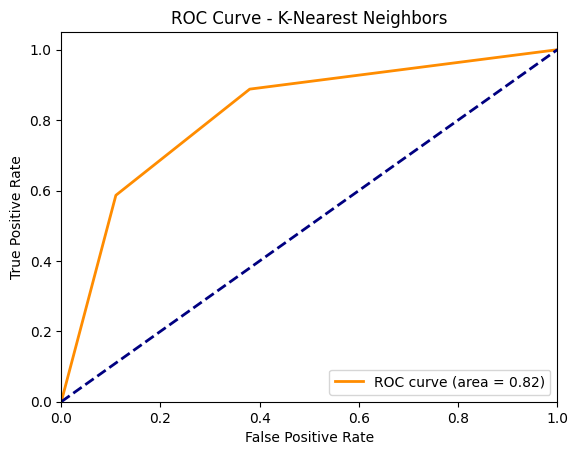

In [27]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay


# Function to calculate and visualize metrics
for model_name, model in models.items():
    start_time = time.time()  # Start time for training

    # Train the model
    model.fit(X_train, y_train)

    train_time = time.time() - start_time  # Calculate training time

    # Predict on test data
    start_time = time.time()  # Start time for prediction
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time  # Calculate prediction time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Output results
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {predict_time:.4f} seconds")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")


    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # Change colormap to 'Blues'
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("\n" + "="*50 + "\n")

# **Pre-Trained GloVe embeddings**

In [2]:

# download glove and unzip it in Notebook.
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove*.zip

--2024-12-18 06:01:33--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2024-12-18 06:01:33--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2024-12-18 06:01:33--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [4]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [ ]:
import numpy as np

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings('/content/glove.42B.300d.txt')  # Adjust path if needed


In [20]:
import numpy as np


def get_document_vector_glove(tokens, embeddings):
    """Get average word vectors for a document using GloVe embeddings."""
    # Get the embedding dimension from the first embedding in the dictionary (if any)
    embedding_dim = next(iter(embeddings.values())).shape[0] if embeddings else 300

    vectors = [embeddings.get(token, np.zeros(embedding_dim)) for token in tokens]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

movies_df['glove_vector'] = movies_df['cleaned_review'].apply(lambda text: get_document_vector_glove(nltk.word_tokenize(text), glove_embeddings))

In [22]:
from sklearn.model_selection import train_test_split

X = np.vstack(movies_df['glove_vector'].values)  # Convert GloVe vectors to a NumPy array
y = movies_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert sentiment to binary labels



## **Train Test Split**

In [23]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Implementation**

In [24]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    # "Support Vector Machine": SVC(kernel='linear',probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


In [27]:
# Before model fitting
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)



## **Model Evalution**

Logistic Regression Accuracy: 84.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4199  762]
 [ 741 4298]]
Training Time: 6.4237 seconds
Prediction Time: 0.0091 seconds
Precision: 0.8497
Recall: 0.8497
F1-score: 0.8497


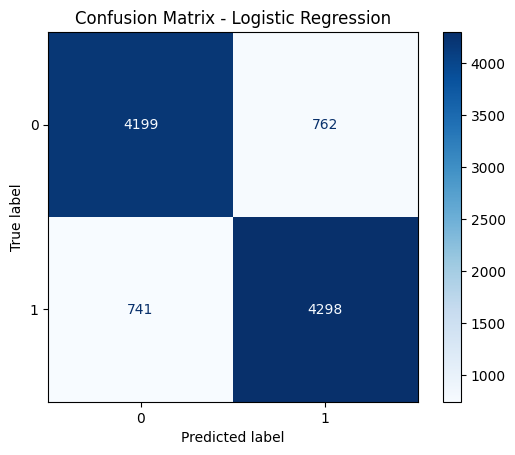

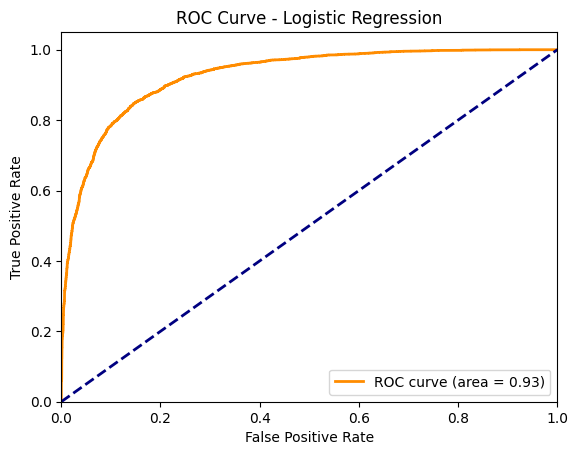



Naive Bayes Accuracy: 74.59%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      4961
           1       0.75      0.74      0.75      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Confusion Matrix:
 [[3739 1222]
 [1319 3720]]
Training Time: 0.0786 seconds
Prediction Time: 0.0462 seconds
Precision: 0.7460
Recall: 0.7459
F1-score: 0.7459


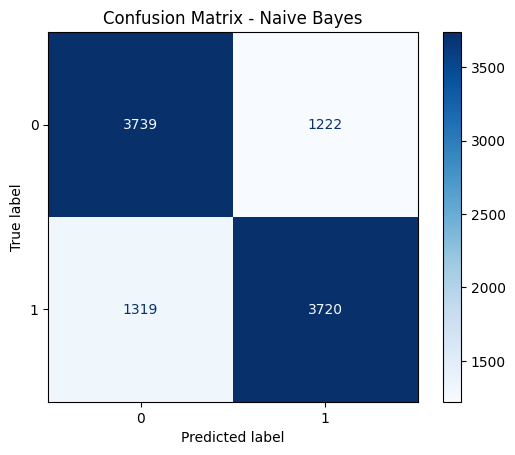

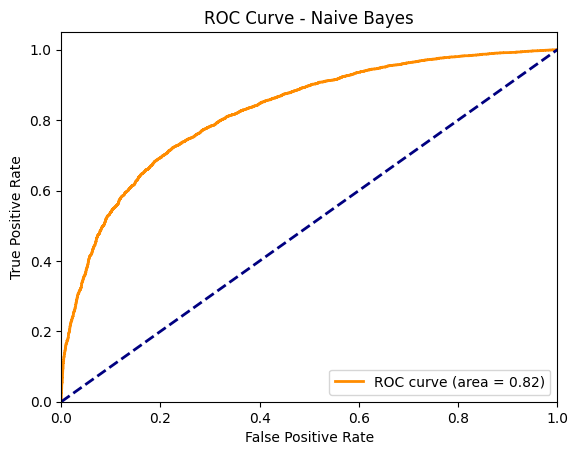



Random Forest Accuracy: 80.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      4961
           1       0.80      0.82      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Confusion Matrix:
 [[3959 1002]
 [ 911 4128]]
Training Time: 119.1946 seconds
Prediction Time: 0.3133 seconds
Precision: 0.8088
Recall: 0.8087
F1-score: 0.8087


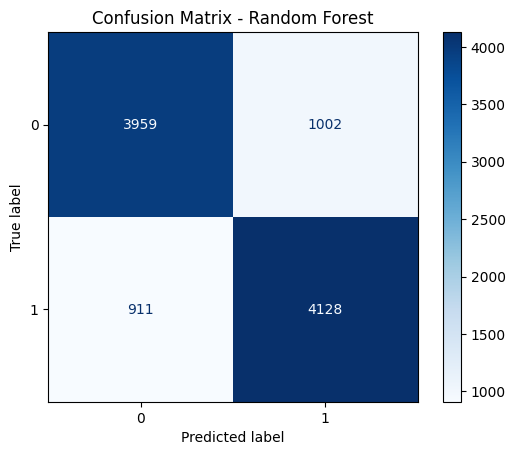

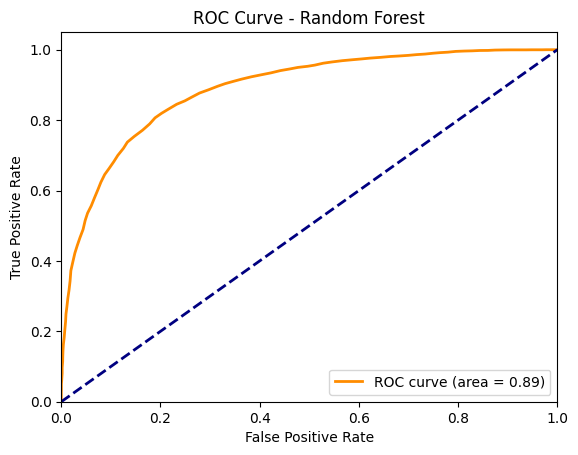



K-Nearest Neighbors Accuracy: 78.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4961
           1       0.80      0.76      0.78      5039

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

Confusion Matrix:
 [[3999  962]
 [1191 3848]]
Training Time: 0.0376 seconds
Prediction Time: 9.6658 seconds
Precision: 0.7854
Recall: 0.7847
F1-score: 0.7846


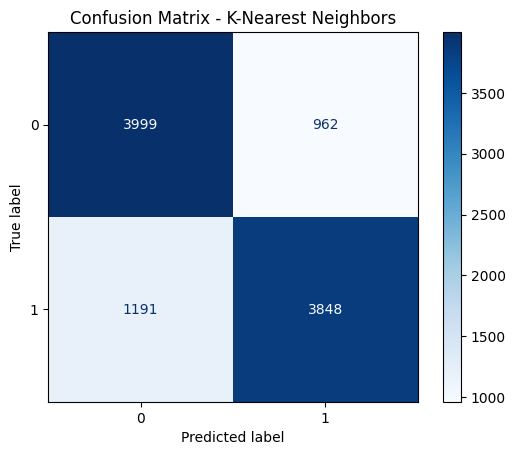

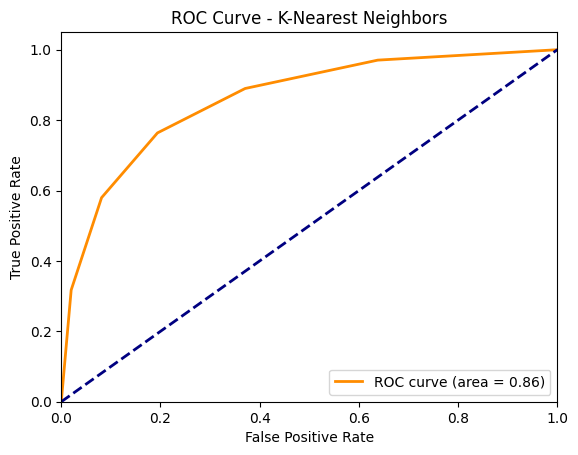

In [28]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay


# Function to calculate and visualize metrics
for model_name, model in models.items():
    start_time = time.time()  # Start time for training

    # Train the model
    model.fit(X_train, y_train)

    train_time = time.time() - start_time  # Calculate training time

    # Predict on test data
    start_time = time.time()  # Start time for prediction
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time  # Calculate prediction time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Output results
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {predict_time:.4f} seconds")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")


    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # Change colormap to 'Blues'
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("\n" + "="*50 + "\n")

In [32]:
import transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Assuming your dataset is loaded into movies_df
# Tokenize the reviews
def tokenize_function(examples):
    return tokenizer(examples["review"], padding="max_length", truncation=True)

# Apply tokenization to your DataFrame
movies_df['input_ids'] = movies_df['review'].apply(lambda x: tokenizer(x, padding="max_length", truncation=True)['input_ids'])
movies_df['attention_mask'] = movies_df['review'].apply(lambda x: tokenizer(x, padding="max_length", truncation=True)['attention_mask'])

# Convert sentiment to numerical labels
movies_df['labels'] = movies_df['sentiment'].apply(lambda x: 1 if x == "positive" else 0)

# Split the dataset
train_df, test_df = train_test_split(movies_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Convert DataFrames to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_df['input_ids'].tolist(), 'attention_mask': train_df['attention_mask'].tolist()}, train_df['labels'].tolist())).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_df['input_ids'].tolist(), 'attention_mask': val_df['attention_mask'].tolist()}, val_df['labels'].tolist())).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_df['input_ids'].tolist(), 'attention_mask': test_df['attention_mask'].tolist()}, test_df['labels'].tolist())).batch(16)

# Load the pre-trained model
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)
#  Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Instead of moving the model to a device using .to(),
# TensorFlow uses strategy.scope() to manage device placement:

# Define the strategy
strategy = tf.distribute.MirroredStrategy()  # Use MirroredStrategy for multiple GPUs or TPU

# Create and compile the model within the strategy scope
with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Now, create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# Predict on the test dataset
predictions = trainer.predict(test_dataset)

# Get predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy on the test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_df['labels'], predicted_labels)
print(f"Test accuracy: {test_accuracy}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


AttributeError: 'TFBertForSequenceClassification' object has no attribute 'to'

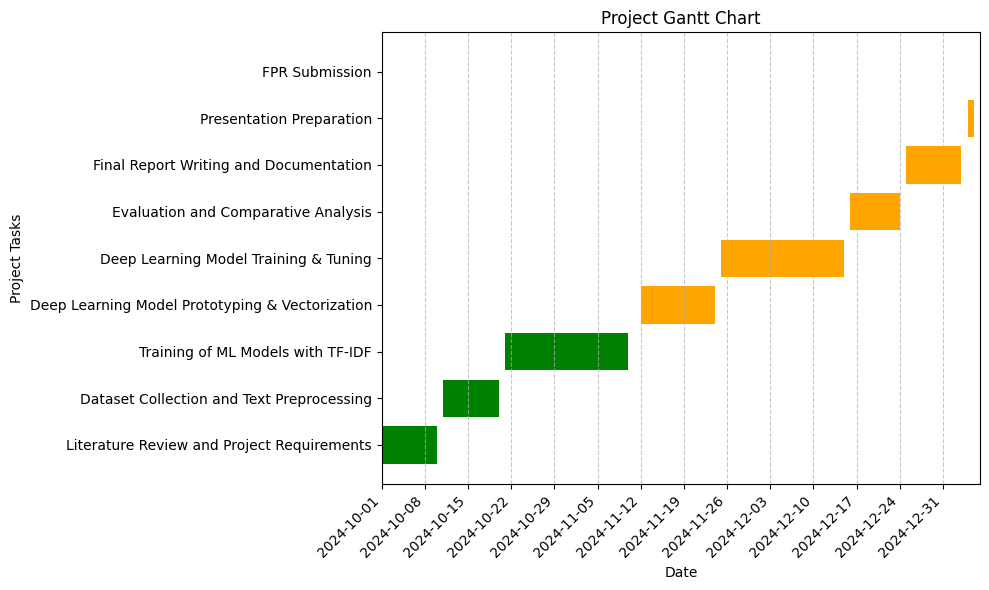

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data for the Gantt chart
tasks = [
    {"Task": "Literature Review and Project Requirements", "Start": "2024-10-01", "End": "2024-10-10", "Status": "Completed"},
    {"Task": "Dataset Collection and Text Preprocessing", "Start": "2024-10-11", "End": "2024-10-20", "Status": "Completed"},
    {"Task": "Training of ML Models with TF-IDF", "Start": "2024-10-21", "End": "2024-11-10", "Status": "Completed"},
    {"Task": "Deep Learning Model Prototyping & Vectorization", "Start": "2024-11-12", "End": "2024-11-24", "Status": "Pending"},
    {"Task": "Deep Learning Model Training & Tuning", "Start": "2024-11-25", "End": "2024-12-15", "Status": "Pending"},
    {"Task": "Evaluation and Comparative Analysis", "Start": "2024-12-16", "End": "2024-12-24", "Status": "Pending"},
    {"Task": "Final Report Writing and Documentation", "Start": "2024-12-25", "End": "2025-01-03", "Status": "Pending"},
    {"Task": "Presentation Preparation", "Start": "2025-01-04", "End": "2025-01-05", "Status": "Pending"},
    {"Task": "FPR Submission", "Start": "2025-01-06", "End": "2025-01-06", "Status": "Due Date"}
]

# Convert data to DataFrame
df = pd.DataFrame(tasks)
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

# Define color mapping based on task status
color_map = {"Completed": "green", "Pending": "orange", "Due Date": "red"}
df["Color"] = df["Status"].map(color_map)

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, task in df.iterrows():
    ax.barh(task["Task"], (task["End"] - task["Start"]).days, left=task["Start"], color=task["Color"])

# Formatting the x-axis to show dates and setting labels
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, ha="right")

# Adding labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Project Tasks")
ax.set_title("Project Gantt Chart")

# Adding grid for easier reading and adjusting layout
plt.grid(visible=True, axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


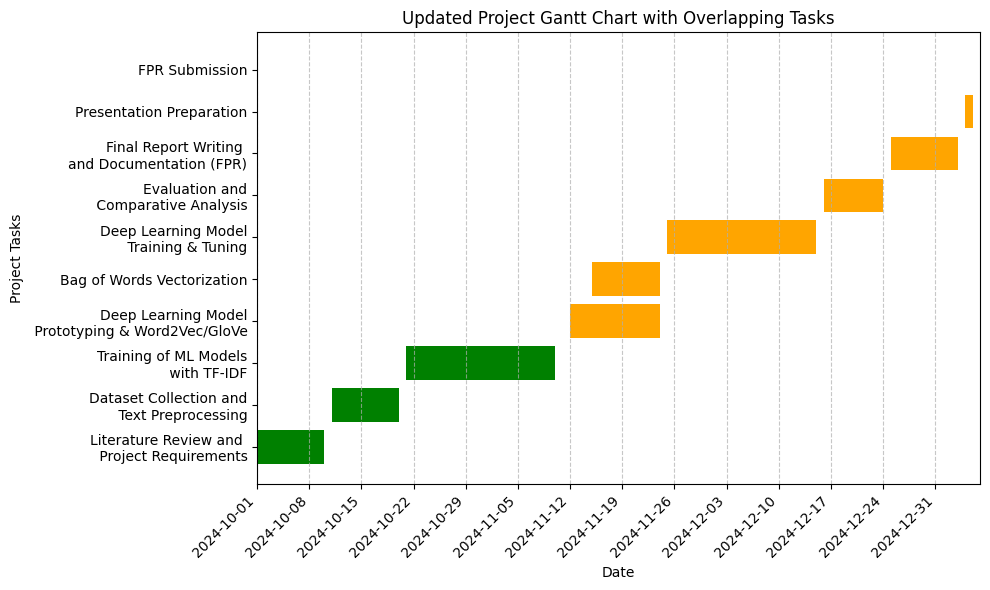

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Updated data with overlapping tasks and FPR writing task
tasks_updated = [
    {"Task": "Literature Review and \n Project Requirements", "Start": "2024-10-01", "End": "2024-10-10", "Status": "Completed"},
    {"Task": "Dataset Collection and Text Preprocessing", "Start": "2024-10-11", "End": "2024-10-20", "Status": "Completed"},
    {"Task": "Training of ML Models with TF-IDF", "Start": "2024-10-21", "End": "2024-11-10", "Status": "Completed"},
    {"Task": "Deep Learning Model Prototyping & Word2Vec/GloVe", "Start": "2024-11-12", "End": "2024-11-24", "Status": "Pending"},
    {"Task": "Bag of Words Vectorization", "Start": "2024-11-15", "End": "2024-11-24", "Status": "Pending"},  # Overlapping with above
    {"Task": "Deep Learning Model Training & Tuning", "Start": "2024-11-25", "End": "2024-12-15", "Status": "Pending"},
    {"Task": "Evaluation and Comparative Analysis", "Start": "2024-12-16", "End": "2024-12-24", "Status": "Pending"},
    {"Task": "Final Report Writing and Documentation (FPR)", "Start": "2024-12-25", "End": "2025-01-03", "Status": "Pending"},
    {"Task": "Presentation Preparation", "Start": "2025-01-04", "End": "2025-01-05", "Status": "Pending"},
    {"Task": "FPR Submission", "Start": "2025-01-06", "End": "2025-01-06", "Status": "Due Date"}
]

# Convert data to DataFrame and date format
df_updated = pd.DataFrame(tasks_updated)
df_updated["Start"] = pd.to_datetime(df_updated["Start"])
df_updated["End"] = pd.to_datetime(df_updated["End"])

# Define color mapping
color_map = {"Completed": "green", "Pending": "orange", "Due Date": "red"}
df_updated["Color"] = df_updated["Status"].map(color_map)

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, task in df_updated.iterrows():
    ax.barh(task["Task"], (task["End"] - task["Start"]).days, left=task["Start"], color=task["Color"])

# Formatting x-axis and adding labels
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, ha="right")

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Project Tasks")
ax.set_title("Updated Project Gantt Chart with Overlapping Tasks")

# Displaying grid for readability
plt.grid(visible=True, axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
